In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Funciones

In [68]:
def cpml_constants(Nx, Nz, dh, fq, vmax, dt, CPMLimit, R):
  d0 = (-3/(2*Lx))*np.log(R)
  
  # Vector X
  X = np.zeros(int(Nx))
  X_val_iz = [Lx - i*dh for i in range(CPMLimit+1)]
  X_val_der = [0 + i*dh for i in range(CPMLimit+1)]

  for i in range(Nx):
    if i < CPMLimit:
      X[i] = X_val_iz[i]
    elif i > Nx - CPMLimit - 1:
      X[i] = X_val_der[i - Nx + CPMLimit + 1]
     
  # Demas parámetros
  d_x = d0 * vmax * (X/Lx)**2
  alpha_x = np.pi * fq * ((Lx - X)/Lx)
  b_x = np.exp(-(d_x + alpha_x) * dt)
  a_x = (dx*(b_x-1))/(dx-alpha_x)
  
  return X, d_x, alpha_x, b_x, a_x

def plot_X(Nx, X):
  plt.figure()
  plt.plot(range(Nx),X)
  plt.xlim([0,Nx])
  plt.xticks(np.arange(0, Nx+1, 50))

  plt.title("Vector X")
  plt.xlabel('$ix$')
  plt.ylabel('$X$')
  plt.show()
  
def plot_ax_bx(Nx, CPMLimit, a_x, b_x):
  # Calculos
  inner_zone = Nx - 2*CPMLimit
  a_x_inner = np.zeros(inner_zone)
  b_x_inner = np.zeros(inner_zone)

  x_inner = np.linspace(CPMLimit, Nx-CPMLimit, inner_zone)

  # Outter zone
  a_x_left = a_x[0:CPMLimit]
  a_x_right = a_x[Nx-CPMLimit:Nx]
                        
  b_x_left = b_x[0:CPMLimit]
  b_x_right = b_x[Nx-CPMLimit:Nx]

  x_left = np.linspace(0, CPMLimit, CPMLimit)
  x_right = np.linspace(Nx-CPMLimit, Nx, CPMLimit)
  
  # Figura
  plt.figure()

  # Zona interior
  plt.plot(x_inner, b_x_inner, c='r')
  plt.plot(x_inner, a_x_inner, c='b', lw=1)

  # Zona de la izquierda
  plt.plot(x_left, b_x_left, label='$b_x$', c='r')
  plt.plot(x_left, a_x_left, label='$a_x$', c='b', lw=1)

  # Zona de la derecha
  plt.plot(x_right, b_x_right, c='r')
  plt.plot(x_right, a_x_right, c='b', lw=1)

  plt.xlim([0,Nx])
  plt.xticks(np.arange(0, Nx+1, 30))

  plt.title("Parámetros $a_x$ $b_x$")
  plt.xlabel('$ix$')
  plt.ylabel('$a_x, b_x$')
  plt.legend()
  plt.show()

# Propagación Original

In [69]:
Nx = 200
Nz = 200
dh = dx = dz = 2.0
fq = 10
vmax = 1200
dt = dh / (vmax * np.sqrt(2))

## Parámetros CPML

In [70]:
CPMLimit = 30
R = 1e-4
Lx = CPMLimit * dh
d0 = (-3/(2*Lx))*np.log(R)
X = np.zeros(int(Nx))


### Vector X

$ X=   \left\{
\begin{array}{ll}
      Lx : dh : 0 & ix \in (-0, CPML] \\
      0           & ix \in (CPML, Nx - CPML) \\
      0 : dh : Lx & ix \in (Nx - CPML, Nx) \\
\end{array} 
\right.  $

In [71]:
# Modificación del vector X

X_val_iz = [Lx - i*dh for i in range(CPMLimit+1)]
X_val_der = [0 + i*dh for i in range(CPMLimit+1)]

for i in range(Nx):
  if i < CPMLimit:
    X[i] = X_val_iz[i]
  if i > Nx - CPMLimit - 1:
    X[i] = X_val_der[i - Nx + CPMLimit + 1]
  

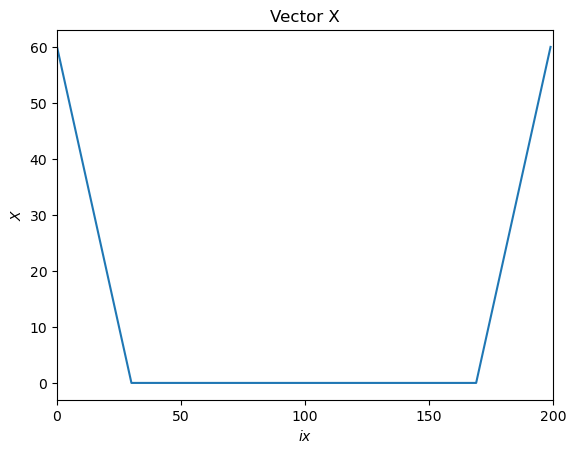

In [72]:
plot_X(Nx, X)

### Parametros $a_x$ $b_x$

In [73]:
d_x = d0 * vmax * (X/Lx)**2
alpha_x = np.pi * fq * ((Lx - X)/Lx)
b_x = np.exp(-(d_x + alpha_x) * dt)
a_x = (d_x/(d_x-alpha_x))*(b_x - 1)

In [74]:
inner_zone = Nx - 2*CPMLimit
a_x_inner = np.zeros(inner_zone)
b_x_inner = np.zeros(inner_zone)

x_inner = np.linspace(CPMLimit, Nx-CPMLimit, inner_zone)

# Outter zone
a_x_left = a_x[0:CPMLimit]
a_x_right = a_x[Nx-CPMLimit:Nx]
                       
b_x_left = b_x[0:CPMLimit]
b_x_right = b_x[Nx-CPMLimit:Nx]

x_left = np.linspace(0, CPMLimit, CPMLimit)
x_right = np.linspace(Nx-CPMLimit, Nx, CPMLimit)

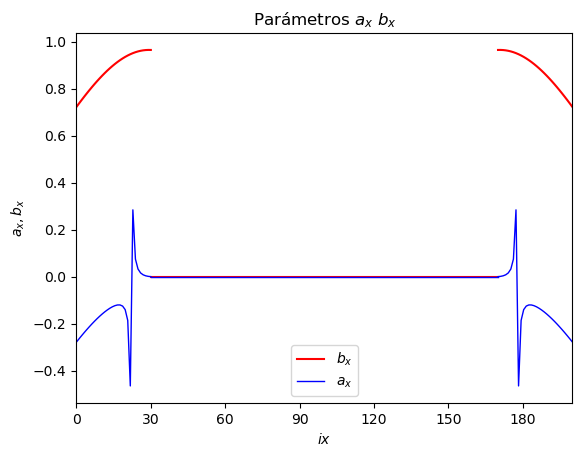

In [75]:
plt.figure()

# Zona interior
plt.plot(x_inner, b_x_inner, c='r')
plt.plot(x_inner, a_x_inner, c='b', lw=1)

# Zona de la izquierda
plt.plot(x_left, b_x_left, label='$b_x$', c='r')
plt.plot(x_left, a_x_left, label='$a_x$', c='b', lw=1)

# Zona de la derecha
plt.plot(x_right, b_x_right, c='r')
plt.plot(x_right, a_x_right, c='b', lw=1)

plt.xlim([0,Nx])
plt.xticks(np.arange(0, Nx+1, 30))

plt.title("Parámetros $a_x$ $b_x$")
plt.xlabel('$ix$')
plt.ylabel('$a_x, b_x$')
plt.legend()
plt.show()

### Parametros $d_x$

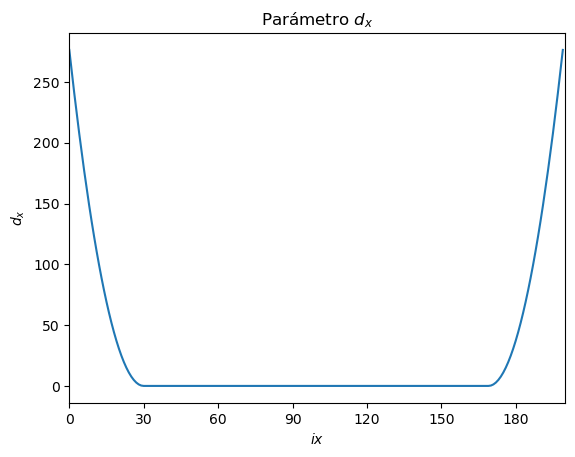

In [76]:
plt.figure()
plt.plot(range(Nx),d_x)
plt.xlim([0,Nx])
plt.xticks(np.arange(0, Nx+1, 30))

plt.title("Parámetro $d_x$")
plt.xlabel('$ix$')
plt.ylabel('$d_x$')
plt.show()

# Caso Rasht

In [77]:
Nx = 450
Nz = 200
dh = dx = dz = 3.33333
fq = 16
vmax = 3000
dt = dh / (vmax * np.sqrt(2))

## CPML

In [78]:
CPMLimit = 20
R = 1e-4
Lx = CPMLimit * dh
d0 = (-3/(2*Lx))*np.log(R)
X = np.zeros(int(Nx))

X, d_x, alpha_x, b_x, a_x = cpml_constants(Nx, Nz, dh, fq, vmax, dt, CPMLimit, R)

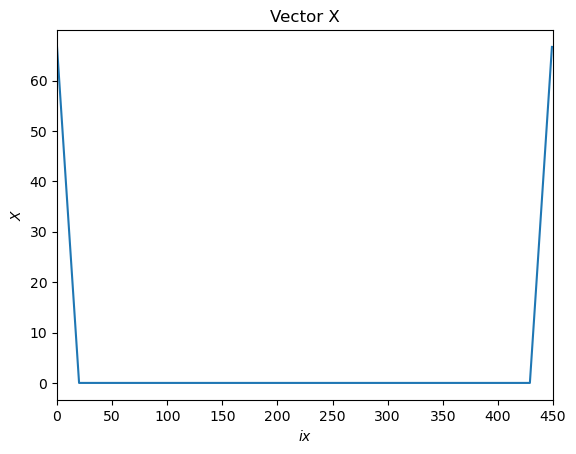

In [79]:
plot_X(Nx, X)

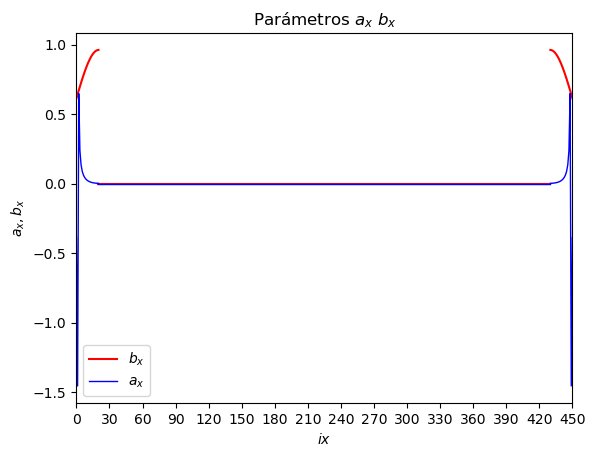

In [80]:
plot_ax_bx(Nx, CPMLimit, a_x, b_x)